# Histogram Processing

In [39]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image


In [40]:
def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

In [41]:
from collections import defaultdict
def hist( x ):
    assert np.issubdtype(x.dtype, np.integer), "Matrix element must be of integral type"
    bins = np.unique(x) # levels
    hist = defaultdict(int) # store histogram
    
    for idx,level in enumerate(bins): 
        hist[level] = np.sum( x == level )
        
    return hist

imgs = ['images/Henry_Moore_Sculpture_0252.jpg',
        'images/Rodin_Burghers_of_Calais_0281.jpg',
        'images/Rodin_Sculpture_0083.jpg',
        'images/emara.jpg']
imgs_rgb = [ np.array(Image.open(img)) for img in imgs ]
imgs_hists = [ (hist(x[:,:,0]),hist(x[:,:,1]),hist(x[:,:,2])) for x in imgs_rgb ]

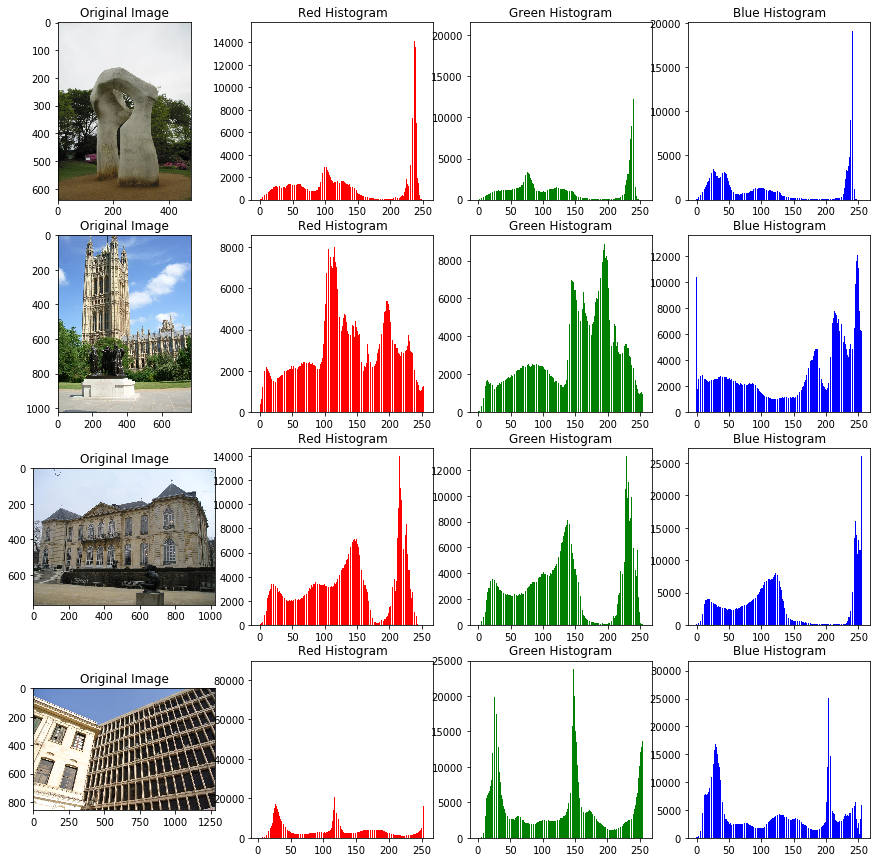

In [42]:
fig, ax = plt.subplots(len(imgs_rgb),4,figsize = (15, 15))
for i,((hist_r,hist_g,hist_b),img) in enumerate(zip(imgs_hists,imgs_rgb)):
    
    ax[i , 0].set_title('Original Image')
    ax[i , 0].imshow(img)

    ax[i , 1].set_title('Red Histogram')
    ax[i , 1].bar(list(hist_r.keys()), hist_r.values(), color='r')
    
    ax[i , 2].set_title('Green Histogram')
    ax[i , 2].bar(list(hist_g.keys()), hist_g.values(), color='g')
    
    ax[i , 3].set_title('Blue Histogram')
    ax[i , 3].bar(list(hist_b.keys()), hist_b.values(), color='b')
    
plt.show()

In [43]:
def hist_eq(x):
    x_hist=hist(x) #histogram
    mx = max(x.ravel())
    y = np.empty(x.shape)
    
    x_hist_norm = np.array( [ x_hist[level] for level in range(mx) ] ) / np.size(x)
    x_hist_cdf = np.cumsum( x_hist_norm )
    
    for level in range(x_hist_norm.shape[0]):
        y[ x == level ] = (x_hist_cdf[level] * mx)
    
    if np.issubdtype(x.dtype, np.integer):
        y = y + 0.5
        
    return y.astype(x.dtype)


<Figure size 1440x720 with 0 Axes>

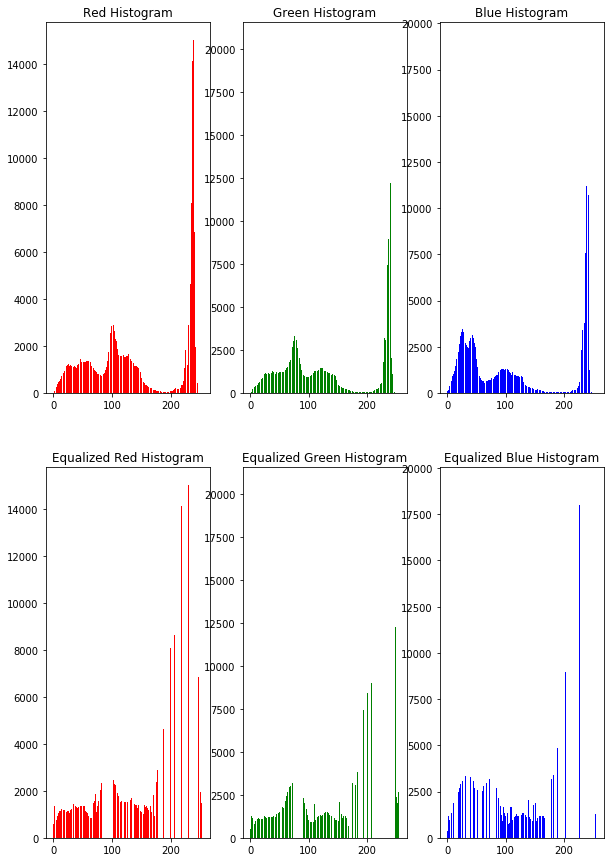

<Figure size 1440x1440 with 0 Axes>

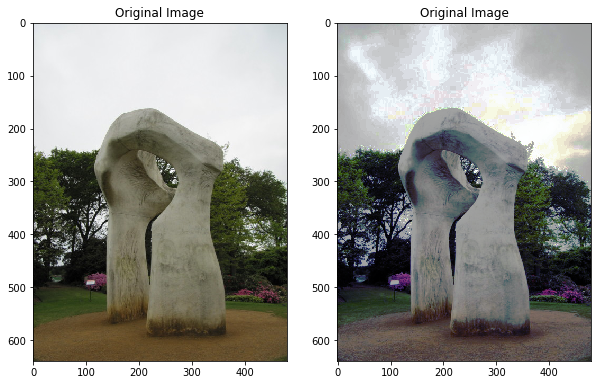

<Figure size 1440x720 with 0 Axes>

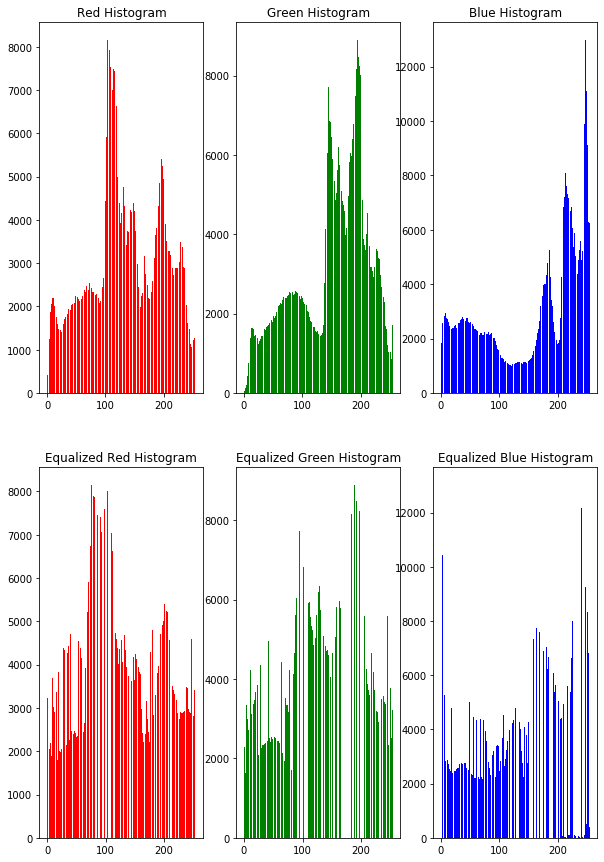

<Figure size 1440x1440 with 0 Axes>

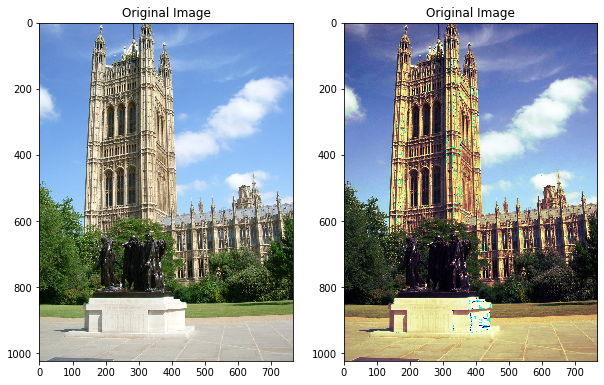

<Figure size 1440x720 with 0 Axes>

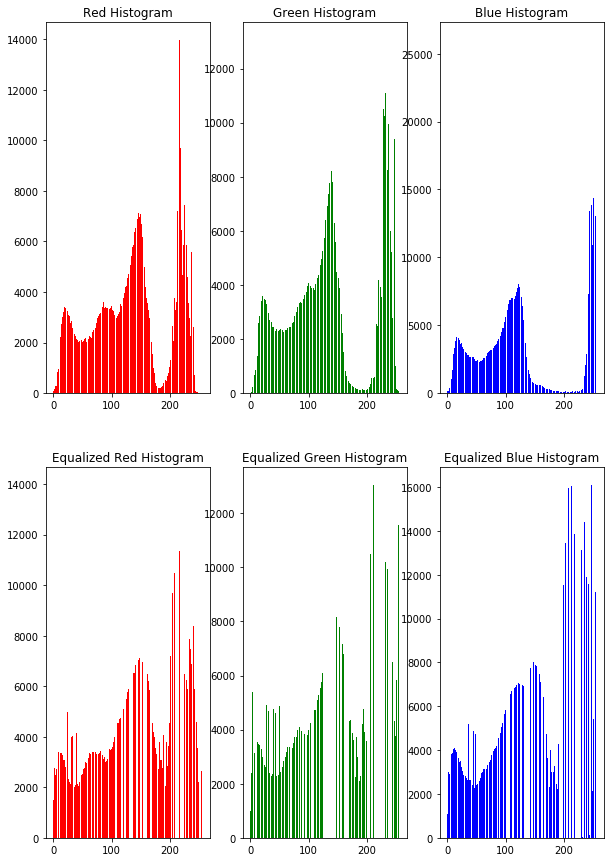

<Figure size 1440x1440 with 0 Axes>

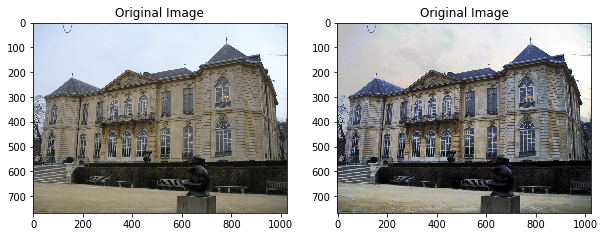

/opt/anaconda3-7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]


<Figure size 1440x720 with 0 Axes>

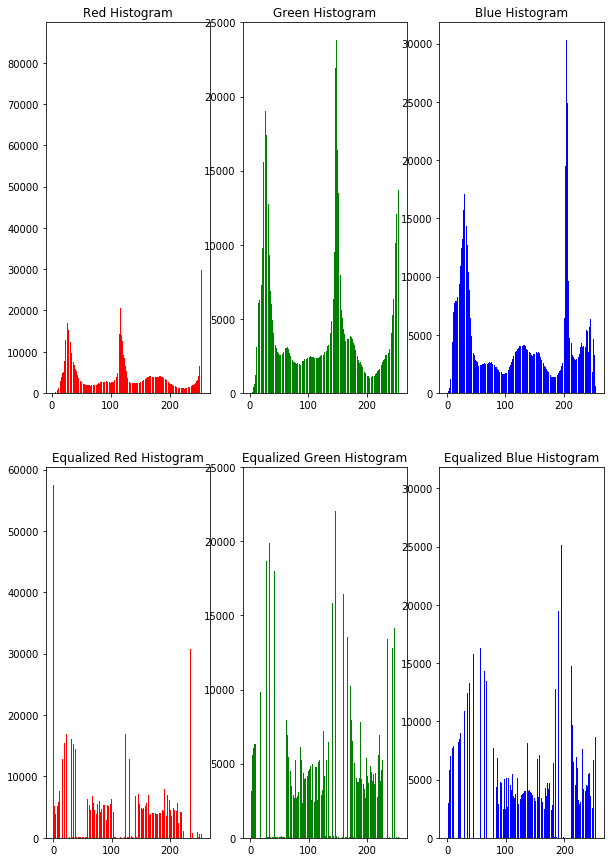

<Figure size 1440x1440 with 0 Axes>

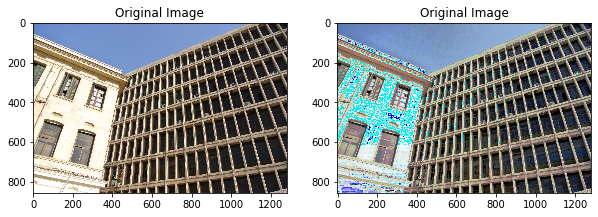

In [54]:
for i,x in enumerate(imgs_rgb):
    fig = plt.figure(figsize=(20,10))    
    fig, ax = plt.subplots(2,3,figsize = (10, 15))
    
    ax_r = ax[0,0]
    ax_g = ax[0,1]
    ax_b = ax[0,2]
    
    ax_er = ax[1,0]
    ax_eg = ax[1,1]
    ax_eb = ax[1,2]
    

    
    hist_x_r, hist_x_g, hist_x_b = hist(x[:,:,0]),hist(x[:,:,1]),hist(x[:,:,2])
    ax_r.set_title('Red Histogram')
    ax_r.bar(list(hist_x_r.keys()), hist_x_r.values(), color='r')
    
    ax_g.set_title('Green Histogram')
    ax_g.bar(list(hist_x_g.keys()), hist_x_g.values(), color='g')
    
    ax_b.set_title('Blue Histogram')
    ax_b.bar(list(hist_x_b.keys()), hist_x_b.values(), color='b')
    
    y = np.empty(x.shape,dtype=x.dtype)
    y[:,:,0], y[:,:,1], y[:,:,2]  = hist_eq(x[:,:,0]), hist_eq(x[:,:,1]), hist_eq(x[:,:,2])
    hist_y_r, hist_y_g, hist_y_b = hist(y[:,:,0]),hist(y[:,:,1]),hist(y[:,:,2])

    ax_er.set_title('Equalized Red Histogram')
    ax_er.bar(list(hist_y_r.keys()), hist_y_r.values(), color='r')
    
    ax_eg.set_title('Equalized Green Histogram')
    ax_eg.bar(list(hist_y_g.keys()), hist_y_g.values(), color='g')
    
    ax_eb.set_title('Equalized Blue Histogram')
    ax_eb.bar(list(hist_y_b.keys()), hist_y_b.values(), color='b')
    
    plt.show()
    
    
    fig = plt.figure(figsize=(20,20),constrained_layout=False)    
    fig, ax = plt.subplots(1,2,figsize = (10, 15))
    
    ax_x = ax[0]
    ax_y = ax[1]
    
    ax_x.set_title('Original Image')
    ax_x.imshow(x)
    
    ax_y.set_title('Original Image')
    ax_y.imshow(y)
    
    plt.show()